# WeatherPy
----

### My Analysis
* Weather is directly corelated to Latitude. As Latitude increases Temperatures drop. 
* There is no strong corelation evident between Latitude and Humidity, Latitude and Cloudiness, as well as Latitue and Wind Speed



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url ='http://api.openweathermap.org/data/2.5/weather?'

ctr= 0
city_df = pd.DataFrame(columns=["City", "Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
units="imperial"
for city in cities:
    ctr += 1
    #params = {"name":city, "appid":api_key}
    query_url = f"{base_url}appid={api_key}&q={city}&units={units}"
    try:   
        #print(query_url)
        response = requests.get(query_url)
        cityweather = response.json()
        print(f"Processing City: {city}, Record  {str(ctr)} of {str(len(cities))}")
        
        if cityweather["cod"] !="404":
            city_df = city_df.append({"City":city, 
                    "Cloudiness" : cityweather['clouds']['all'],
                    "Country":  cityweather['sys']['country'],
                    "Date":  cityweather['dt'],
                    "Humidity":  cityweather['main']['humidity'],
                    "Lat":  cityweather['coord']['lat'],
                    "Lng": cityweather['coord']['lon'],
                    "Max Temp":  cityweather['main']['temp_max'],
                    "Wind Speed":  cityweather['wind']['speed']},
                   ignore_index=True)
        else:
            print(f"City:{city} not found")
        
    except ("KeyError"):
         print (f"Key error occured for {city}")    


Processing City: luderitz, Record  1 of 607
Processing City: veere, Record  2 of 607
Processing City: khatanga, Record  3 of 607
Processing City: thinadhoo, Record  4 of 607
Processing City: carnarvon, Record  5 of 607
Processing City: bluff, Record  6 of 607
Processing City: tsihombe, Record  7 of 607
City:tsihombe not found
Processing City: port alfred, Record  8 of 607
Processing City: amderma, Record  9 of 607
City:amderma not found
Processing City: port elizabeth, Record  10 of 607
Processing City: jamestown, Record  11 of 607
Processing City: yumen, Record  12 of 607
Processing City: ushuaia, Record  13 of 607
Processing City: tefe, Record  14 of 607
Processing City: broome, Record  15 of 607
Processing City: atuona, Record  16 of 607
Processing City: suntar, Record  17 of 607
Processing City: tuktoyaktuk, Record  18 of 607
Processing City: selkirk, Record  19 of 607
Processing City: vaini, Record  20 of 607
Processing City: mataura, Record  21 of 607
Processing City: rikitea, Re

Processing City: salinas, Record  170 of 607
Processing City: sao filipe, Record  171 of 607
Processing City: yining, Record  172 of 607
Processing City: lubango, Record  173 of 607
Processing City: ulladulla, Record  174 of 607
Processing City: qandahar, Record  175 of 607
City:qandahar not found
Processing City: upernavik, Record  176 of 607
Processing City: kyzyl-suu, Record  177 of 607
Processing City: evensk, Record  178 of 607
Processing City: lasa, Record  179 of 607
Processing City: alice town, Record  180 of 607
Processing City: baffa, Record  181 of 607
Processing City: barentsburg, Record  182 of 607
City:barentsburg not found
Processing City: tual, Record  183 of 607
Processing City: sorland, Record  184 of 607
Processing City: oktyabrskiy, Record  185 of 607
Processing City: cidreira, Record  186 of 607
Processing City: comodoro rivadavia, Record  187 of 607
Processing City: hokitika, Record  188 of 607
Processing City: mezhgorye, Record  189 of 607
City:mezhgorye not foun

Processing City: tall kayf, Record  337 of 607
Processing City: moose factory, Record  338 of 607
Processing City: nsanje, Record  339 of 607
Processing City: lompoc, Record  340 of 607
Processing City: vaitupu, Record  341 of 607
City:vaitupu not found
Processing City: roma, Record  342 of 607
Processing City: san patricio, Record  343 of 607
Processing City: balkhash, Record  344 of 607
Processing City: tapes, Record  345 of 607
Processing City: angoche, Record  346 of 607
Processing City: cherskiy, Record  347 of 607
Processing City: grindavik, Record  348 of 607
Processing City: reinosa, Record  349 of 607
Processing City: grand centre, Record  350 of 607
City:grand centre not found
Processing City: qaqortoq, Record  351 of 607
Processing City: russell, Record  352 of 607
Processing City: slave lake, Record  353 of 607
Processing City: alice springs, Record  354 of 607
Processing City: saint-pierre, Record  355 of 607
Processing City: talnakh, Record  356 of 607
Processing City: ne

Processing City: otane, Record  508 of 607
Processing City: guatire, Record  509 of 607
Processing City: xinxiang, Record  510 of 607
Processing City: araouane, Record  511 of 607
Processing City: san jose, Record  512 of 607
Processing City: noceto, Record  513 of 607
Processing City: gondar, Record  514 of 607
Processing City: san quintin, Record  515 of 607
Processing City: pindiga, Record  516 of 607
Processing City: vao, Record  517 of 607
Processing City: big rapids, Record  518 of 607
Processing City: ormara, Record  519 of 607
Processing City: havoysund, Record  520 of 607
Processing City: eureka, Record  521 of 607
Processing City: jaicos, Record  522 of 607
Processing City: quetzaltepec, Record  523 of 607
City:quetzaltepec not found
Processing City: marabba, Record  524 of 607
Processing City: purificacion, Record  525 of 607
Processing City: mirskoy, Record  526 of 607
Processing City: kamenka, Record  527 of 607
Processing City: along, Record  528 of 607
Processing City: t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Write to CSV file            
export_csv = city_df.to_csv(output_data_file, index = None, header=True) 

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,luderitz,0,NA,1553293926,92,-26.65,15.16,58.22,7.52
1,veere,90,NL,1553293992,93,51.55,3.67,48.20,10.29
2,khatanga,12,RU,1553293945,53,71.98,102.47,-18.38,4.38
3,thinadhoo,48,MV,1553293779,99,0.53,72.93,85.45,6.98
4,carnarvon,20,ZA,1553293906,50,-30.97,22.13,54.53,7.40


In [5]:
import datetime
today = datetime.datetime.today().strftime('%m/%d/%y')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

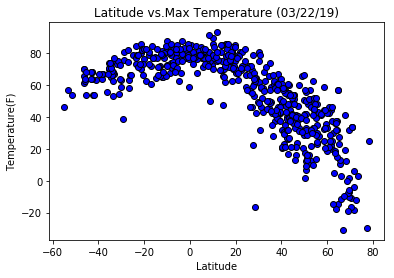

In [11]:
plt.scatter(city_df['Lat'], city_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs.Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel('Temperature(F)')
plt.savefig("LatvsTemp")
plt.show()

In [19]:
# There is one City which seemed to be an outlier with a humidity of 290.This outlier was presenting a false trend, hence removed

city_df = city_df.loc[city_df["Humidity"] <250]

#### Latitude vs. Humidity Plot

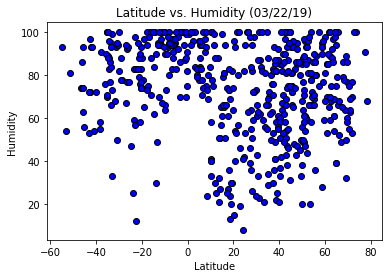

In [16]:
plt.scatter(city_df['Lat'], city_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.savefig("LatvsHumid")
plt.show()

#### Latitude vs. Cloudiness Plot

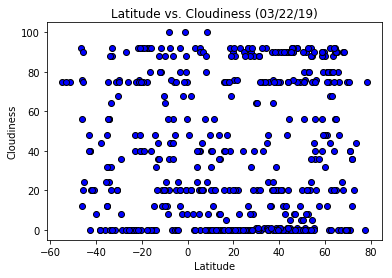

In [8]:
plt.scatter(city_df['Lat'], city_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.savefig("LatvsCloud")
plt.show()

#### Latitude vs. Wind Speed Plot

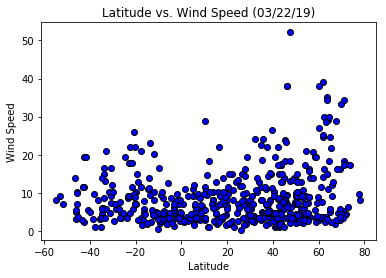

In [9]:
plt.scatter(city_df['Lat'], city_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.savefig("LatvsWSpeed")
plt.show()